In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import time

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [3]:
imgs_list = glob.glob('../imgs_pdi/*')

In [4]:
imgs_list.sort()

In [5]:
for img in enumerate(imgs_list):
    print(img)

(0, '../imgs_pdi/aorta.jpg')
(1, '../imgs_pdi/cubo_magico.jpg')
(2, '../imgs_pdi/fpb.png')
(3, '../imgs_pdi/hsv_python.png')
(4, '../imgs_pdi/joelho.jpg')
(5, '../imgs_pdi/leao.jpeg')
(6, '../imgs_pdi/limao_amarelo.jpg')
(7, '../imgs_pdi/moedas04.jpg')
(8, '../imgs_pdi/montanha.jpg')
(9, '../imgs_pdi/paisagem.jpg')
(10, '../imgs_pdi/pedestres02.jpg')
(11, '../imgs_pdi/pelagem.jpg')
(12, '../imgs_pdi/pre-historia01.jpeg')
(13, '../imgs_pdi/pre-historia02.jpeg')
(14, '../imgs_pdi/psicopata.jpg')
(15, '../imgs_pdi/rainbow-fruits.jpg')


* Selecionar a imagem para todas as questões de acordo o index da lista acima

In [6]:
img_path = imgs_list[8]

(625, 2048, 3)

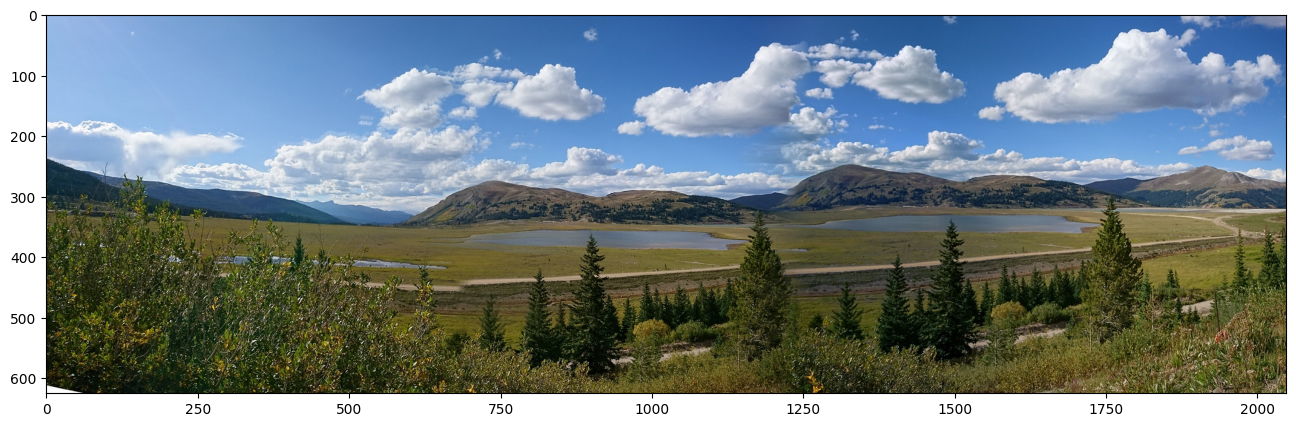

In [7]:
fig = plt.figure(figsize=(16,12))
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
img_rgb.shape

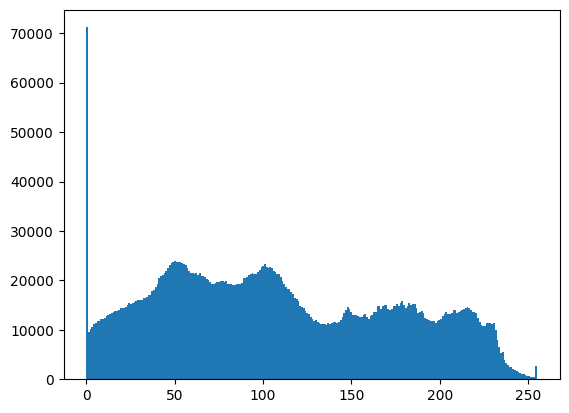

In [8]:
plt.hist(img_rgb.ravel(),bins=256)
plt.show()

In [32]:
def kmeans(img, k, itera, epsilon):
    try:
        _, _, channels = img.shape
        pixel_values = img.reshape((-1, channels))
    except:
        pixel_values = img.reshape((-1, 1))
        
    pixel_values = np.float32(pixel_values)
    print(f'Input: {pixel_values.shape}')
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, itera, epsilon)

    start = time.time()
    distance, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    end = time.time()
    print(f'Tempo de execução do algoritmo: {round(end-start,2)} segundos')

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)

    return segmented_image, distance, labels, centers

In [106]:
image, distance, labels, centers = kmeans(img_rgb, 4, 1000, 0)

In [107]:
centers

array([[167, 187, 213],
       [ 38,  42,  18],
       [ 82, 126, 181],
       [ 99,  96,  65]], dtype=uint8)

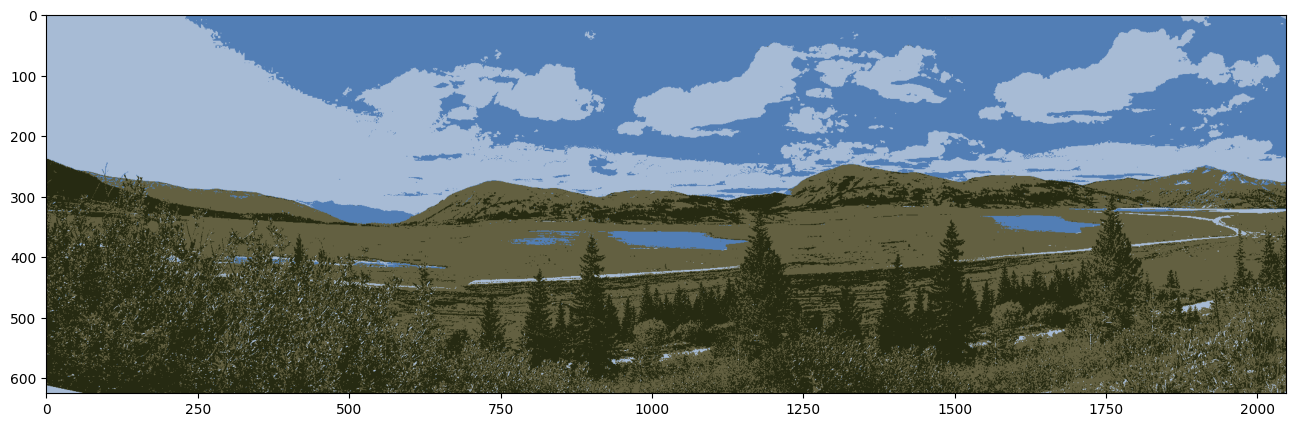

In [108]:
fig = plt.figure(figsize=(16,12))
plt.imshow(image)
plt.show()

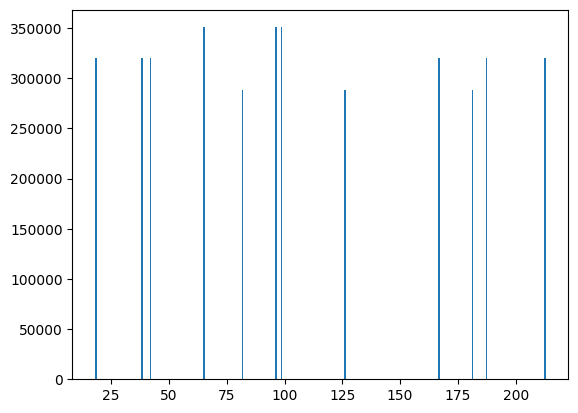

In [69]:
plt.hist(image.ravel(), bins=255)
plt.show()

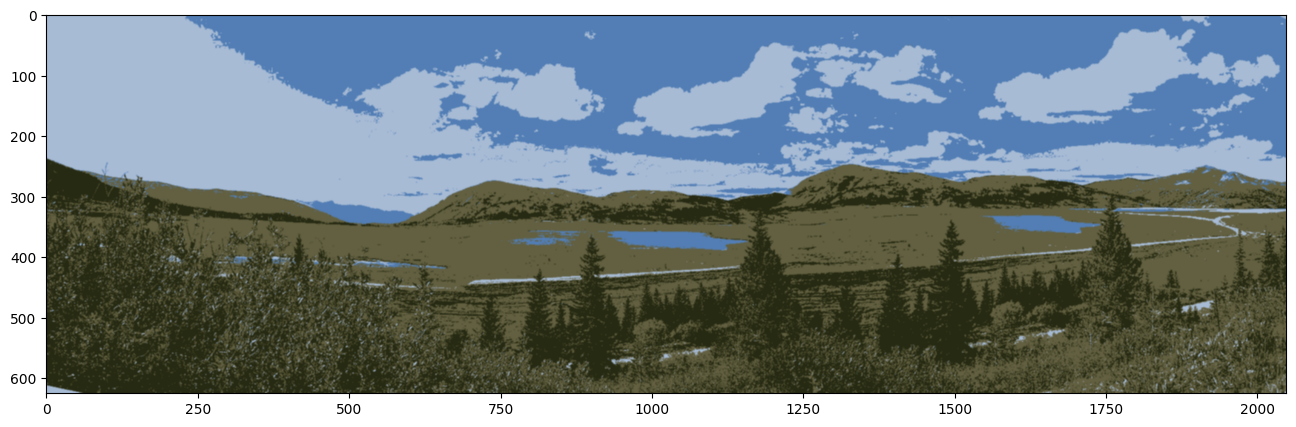

In [70]:
kernel = np.ones((3,3),np.float32)/9
dst_bgr = cv2.filter2D(image,-1,kernel)

fig = plt.figure(figsize=(16,12))
plt.imshow(dst_bgr)

In [71]:
dst_gray = cv2.cvtColor(dst_bgr, cv2.COLOR_RGB2GRAY)

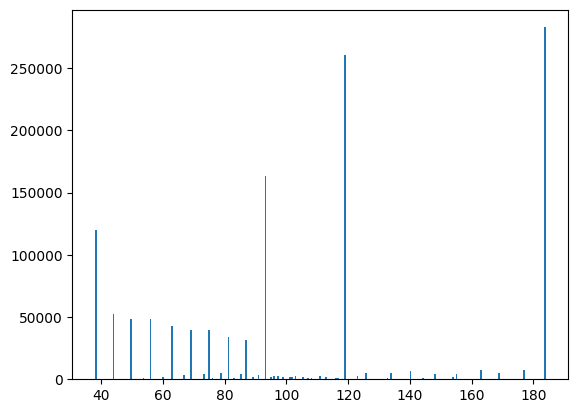

In [72]:
plt.hist(dst_gray.ravel(), bins=255)
plt.show()

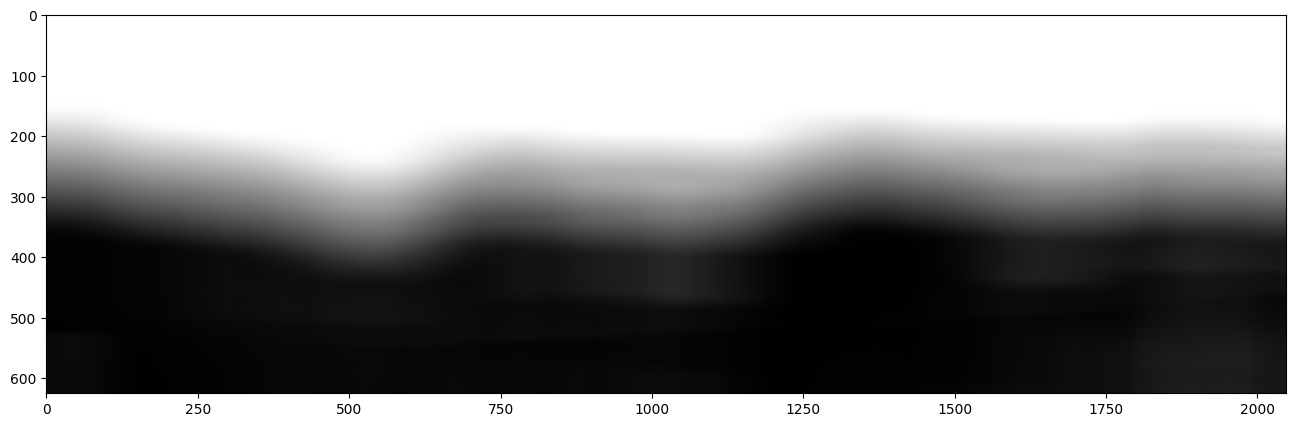

In [73]:
ret,seg = cv2.threshold(dst_gray,100,255,cv2.THRESH_BINARY)
seg = cv2.filter2D(seg,-1,kernel)
fig = plt.figure(figsize=(16,12))
seg = cv2.blur(seg,(200,200))
plt.imshow(seg, cmap='gray')

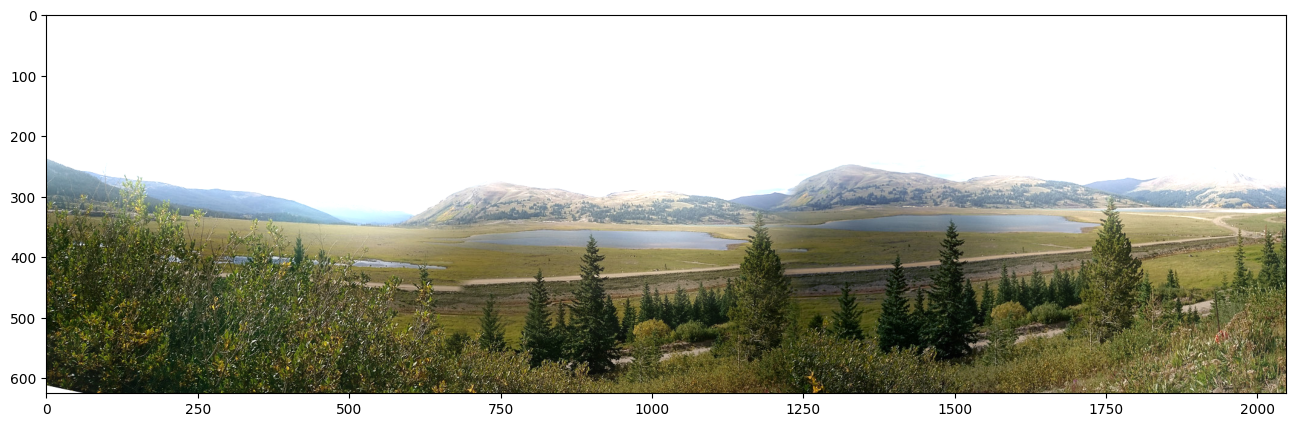

In [74]:
seg = cv2.cvtColor(seg, cv2.COLOR_GRAY2BGR)
img_final = cv2.add(img_rgb,seg)
fig = plt.figure(figsize=(16,12))
plt.imshow(img_final)

# Filtro passa-baixas

![FPB](../imgs_pdi/fpb.png "Filtro passa-baixas")

In [37]:
image[i,j,:][0]

167

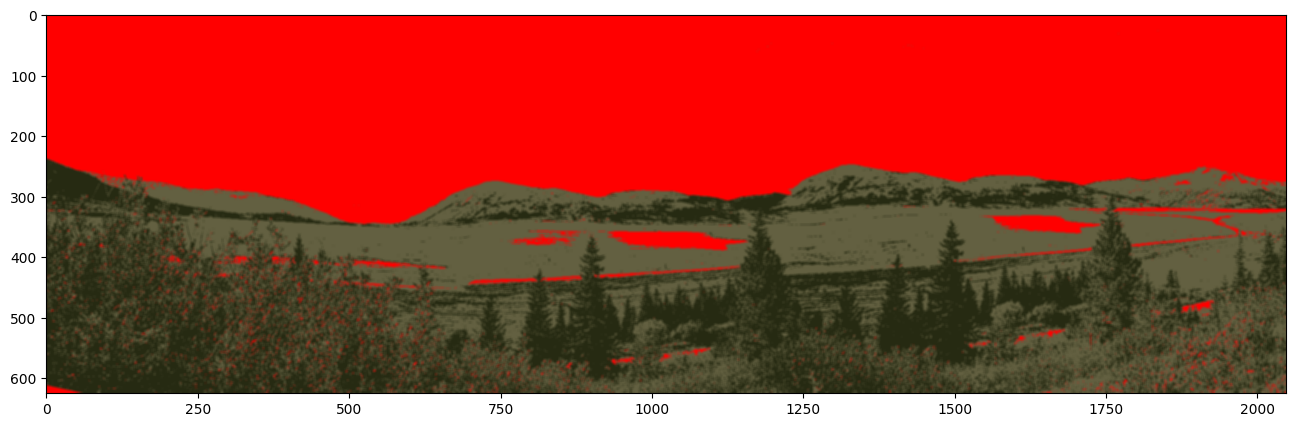

In [40]:
image_mask = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j,:].tolist() == [82, 126, 181] or image[i,j,:].tolist() == [167, 187, 213] :
            image_mask[i,j,:] = (255,0,0)
        else:
            image_mask[i,j,:] = (image[i,j,:][0],image[i,j,:][1],image[i,j,:][2])

kernel = np.ones((5,5),np.float32)/25
image_mask_blur = cv2.filter2D(image_mask,-1,kernel)

fig = plt.figure(figsize=(16,12))
plt.imshow(image_mask_blur)
plt.show()

In [33]:
img_final2 = cv2.add(img_rgb, image_mask_blur)

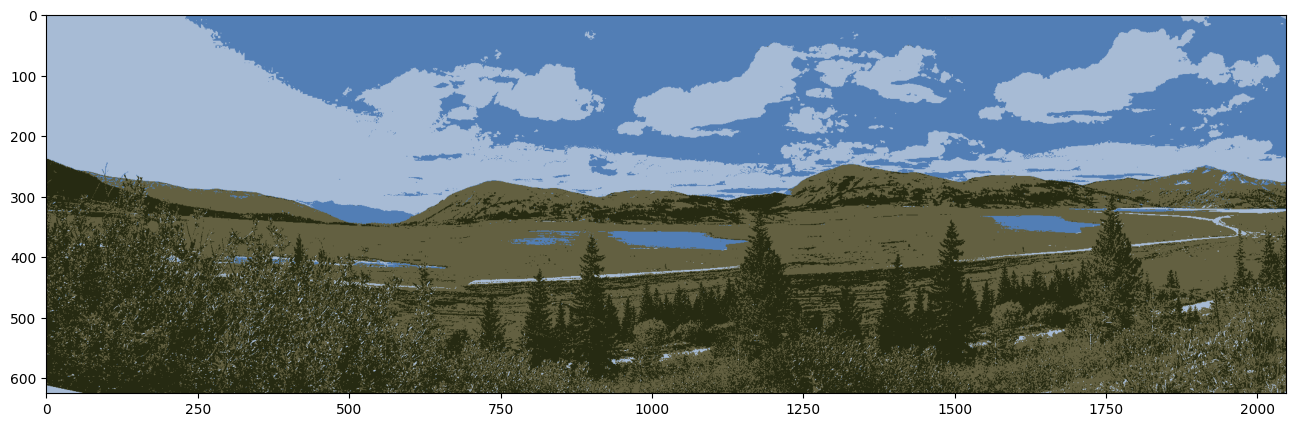

In [34]:
fig = plt.figure(figsize=(16,12))
plt.imshow(image)

In [ ]:
kernel = np.ones((3,3),np.float32)/9
dst_bgr = cv2.filter2D(image,-1,kernel)

In [ ]:
kernel = np.ones((8,8),np.float32)/25
dst = cv2.filter2D(img_gray,-1,kernel)

In [ ]:
image, centers = kmeans(dst, 20, 200, 0.2)
fig = plt.figure(figsize=(16,12))
plt.imshow(image, cmap='gray')

Input: (1280000, 1)
Tempo de execução do algoritmo: 52.87 segundos


ValueError: too many values to unpack (expected 2)

In [ ]:
plt.hist(image.ravel(), bins=255)
plt.show()

In [ ]:
ret,seg = cv2.threshold(dst,180,255,cv2.THRESH_BINARY_INV)
dst =cv2.blur(seg,(2,2))

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.imshow(seg, cmap='gray')

In [ ]:
seg2 = cv2.add(img_gray, dst)
fig = plt.figure(figsize=(16,12))
plt.imshow(seg2, cmap='gray')